In [23]:
import pandas as pd

# Load the CSV file
file_path = '../results/unseen_data_with_predictions.csv'  # Replace with the correct file path
df = pd.read_csv(file_path)

# Preview the data
print(df.head())

# Filter for 'Charged Off' and 'Fully Paid' loans
charged_off_loans = df[df['Predicted_Loan_Status'] == 1]
paid_off_loans = df[df['Predicted_Loan_Status'] == 0]

# Calculate statistics
charged_off_count = charged_off_loans.shape[0]
paid_off_count = paid_off_loans.shape[0]

total_loans = df.shape[0]

# Calculate percentages
charged_off_percentage = (charged_off_count / total_loans) * 100
paid_off_percentage = (paid_off_count / total_loans) * 100

# Calculate total funded amount for both categories
charged_off_total_amount = charged_off_loans['loan_amount'].sum()
paid_off_total_amount = paid_off_loans['loan_amount'].sum()

# Output the results
print(f'Total Loans: {total_loans}')
print(f'Charged Off Loans: {charged_off_count} ({charged_off_percentage:.2f}%)')
print(f'Fully Paid Loans: {paid_off_count} ({paid_off_percentage:.2f}%)')
print(f'Total Amount for Charged Off Loans: ${charged_off_total_amount:,.2f}')
print(f'Total Amount for Fully Paid Loans: ${paid_off_total_amount:,.2f}')


   address_state  application_type  emp_length  grade  home_ownership  \
0             10                 0           7      0               0   
1             32                 0           1      1               0   
2             19                 0           1      1               0   
3             16                 0           2      1               0   
4             27                 0           2      1               0   

   last_credit_pull_date  purpose  sub_grade  term  verification_status  ...  \
0                    105        1          4     1                    0  ...   
1                    105        1          5     1                    0  ...   
2                    104        1          6     1                    0  ...   
3                    105        1          6     1                    0  ...   
4                    105        1          7     1                    0  ...   

   last_payment_quarter  last_payment_is_weekend  next_payment_year  \
0        

In [27]:
import pandas as pd

# Load the CSV file
file_path = '../results/unseen_data_with_predictions.csv'  # Replace with the correct file path
df = pd.read_csv(file_path)

# Preview the data
print(df.head())

# Filter for 'Charged Off' and 'Fully Paid' loans
charged_off_loans = df[df['Predicted_Loan_Status'] == 1]
paid_off_loans = df[df['Predicted_Loan_Status'] == 0]

# Calculate statistics
charged_off_count = charged_off_loans.shape[0]
paid_off_count = paid_off_loans.shape[0]
total_loans = df.shape[0]

# Calculate percentages
charged_off_percentage = (charged_off_count / total_loans) * 100
paid_off_percentage = (paid_off_count / total_loans) * 100

# Calculate total funded amount for both categories
charged_off_total_amount = charged_off_loans['loan_amount'].sum()
paid_off_total_amount = paid_off_loans['loan_amount'].sum()

# Calculate Prediction Probability statistics for both categories
charged_off_avg_prob = charged_off_loans['Prediction_Probability'].mean()
paid_off_avg_prob = paid_off_loans['Prediction_Probability'].mean()

charged_off_min_prob = charged_off_loans['Prediction_Probability'].min()
paid_off_min_prob = paid_off_loans['Prediction_Probability'].min()

charged_off_max_prob = charged_off_loans['Prediction_Probability'].max()
paid_off_max_prob = paid_off_loans['Prediction_Probability'].max()

# Output the results
print(f'Total Loans: {total_loans}')
print(f'Charged Off Loans: {charged_off_count} ({charged_off_percentage:.2f}%)')
print(f'Fully Paid Loans: {paid_off_count} ({paid_off_percentage:.2f}%)')
print(f'Total Amount for Charged Off Loans: ${charged_off_total_amount:,.2f}')
print(f'Total Amount for Fully Paid Loans: ${paid_off_total_amount:,.2f}')

print(f'\nPrediction Probability for Charged Off Loans:')
print(f'Average: {charged_off_avg_prob:.2f}')
print(f'Minimum: {charged_off_min_prob:.2f}')
print(f'Maximum: {charged_off_max_prob:.2f}')

print(f'\nPrediction Probability for Fully Paid Loans:')
print(f'Average: {paid_off_avg_prob:.2f}')
print(f'Minimum: {paid_off_min_prob:.2f}')
print(f'Maximum: {paid_off_max_prob:.2f}')


   address_state  application_type  emp_length  grade  home_ownership  \
0             10                 0           7      0               0   
1             32                 0           1      1               0   
2             19                 0           1      1               0   
3             16                 0           2      1               0   
4             27                 0           2      1               0   

   last_credit_pull_date  purpose  sub_grade  term  verification_status  ...  \
0                    105        1          4     1                    0  ...   
1                    105        1          5     1                    0  ...   
2                    104        1          6     1                    0  ...   
3                    105        1          6     1                    0  ...   
4                    105        1          7     1                    0  ...   

   last_payment_quarter  last_payment_is_weekend  next_payment_year  \
0        

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


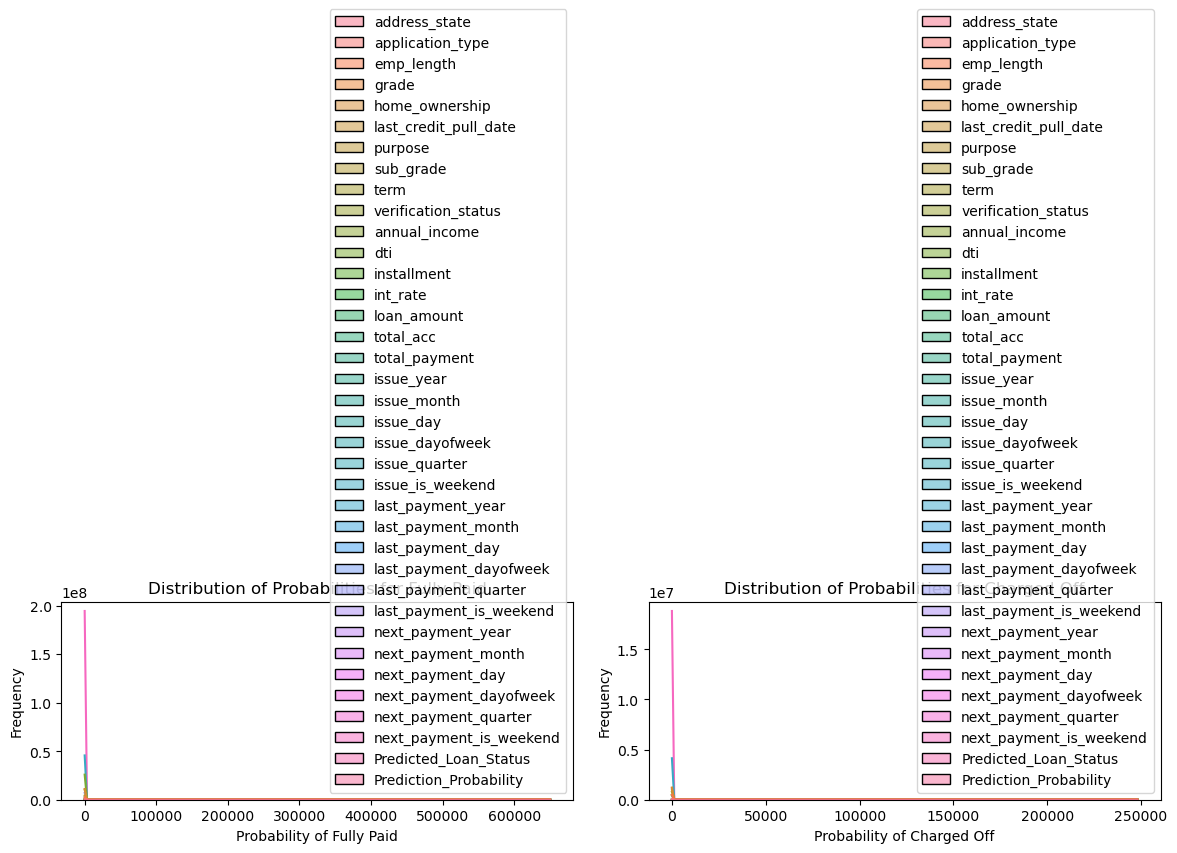

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the distribution of probabilities for each class
plt.figure(figsize=(12, 6))

# Probability of Fully Paid
plt.subplot(1, 2, 1)
sns.histplot(paid_off_loans, bins=20, kde=True, color='blue')
plt.title('Distribution of Probabilities for Fully Paid')
plt.xlabel('Probability of Fully Paid')
plt.ylabel('Frequency')

# Probability of Charged Off
plt.subplot(1, 2, 2)
sns.histplot(charged_off_loans, bins=20, kde=True, color='red')
plt.title('Distribution of Probabilities for Charged Off')
plt.xlabel('Probability of Charged Off')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

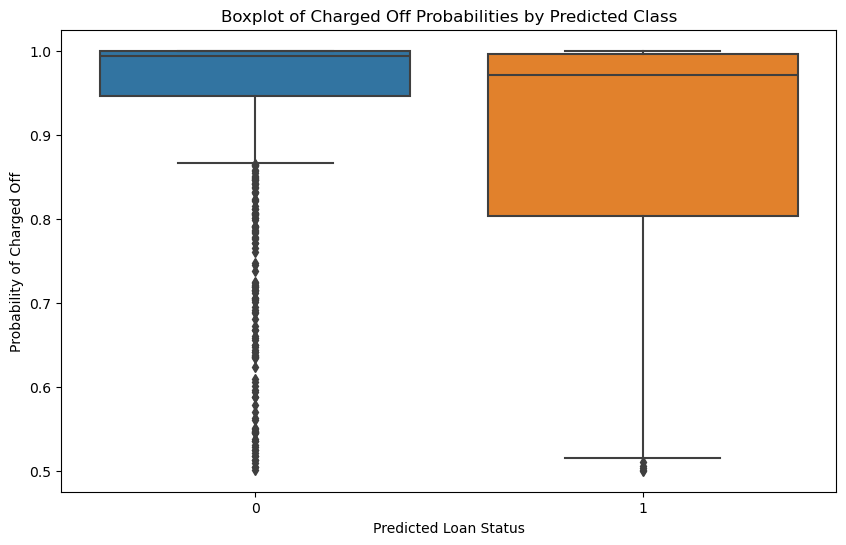

In [32]:
# Boxplot to compare the distributions of probabilities by predicted class
plt.figure(figsize=(10, 6))

sns.boxplot(x='Predicted_Loan_Status', y='Prediction_Probability', data=df)
plt.title('Boxplot of Charged Off Probabilities by Predicted Class')
plt.xlabel('Predicted Loan Status')
plt.ylabel('Probability of Charged Off')
plt.show()

Risk Level Distribution:
 Risk_Level
High Risk        86.877395
Moderate Risk    13.122605
Low Risk          0.000000
Name: proportion, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'numpy.int64' object has no attribute 'startswith'

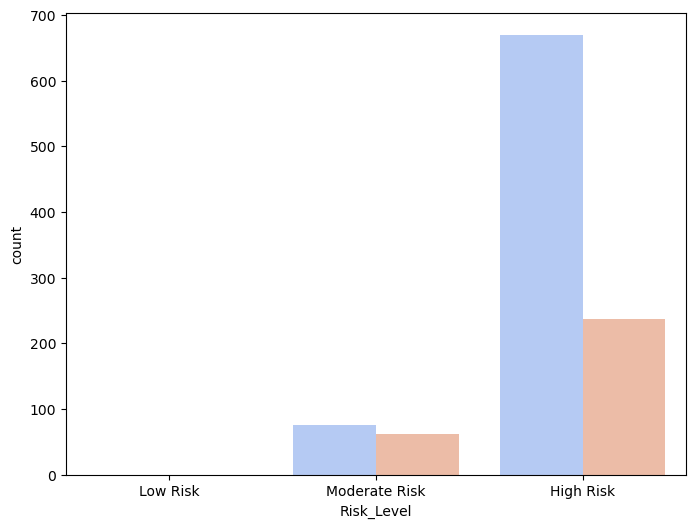

In [33]:
# Define risk levels based on predicted probabilities
df['Risk_Level'] = pd.cut(df['Prediction_Probability'],
                                  bins=[0, 0.25, 0.75, 1],
                                  labels=['Low Risk', 'Moderate Risk', 'High Risk'])

# Distribution of risk levels
risk_distribution = df['Risk_Level'].value_counts(normalize=True) * 100
print("Risk Level Distribution:\n", risk_distribution)

# Visualizing risk levels by class
plt.figure(figsize=(8, 6))
sns.countplot(x='Risk_Level', hue='Predicted_Loan_Status', data=df, palette='coolwarm')
plt.title('Risk Levels by Predicted Loan Status')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()